In [ ]:
import os
import numpy as np
import cv2
import urllib.request

def store_raw_images():
    neg_images_link='http://image-net.org/api/text/imagenet.synset.geturls?wnid=n02823750'
    neg_image_urls=urllib.request.urlopen(neg_images_link).read().decode()
    pic_num=1
    
    if not os.path.exists('neg'):
        os.makedirs('neg')
        
    for i in neg_image_urls.split('\n'):
        try:
            
            print(i)
            urllib.request.urlretrieve(i, "neg/"+str(pic_num)+".jpg")
            img = cv2.imread("neg/"+str(pic_num)+".jpg",cv2.IMREAD_GRAYSCALE)
            resized_image = cv2.resize(img, (100, 100))
            cv2.imwrite("neg/"+str(pic_num)+".jpg",resized_image)
            pic_num += 1
            
        except Exception as e:
            print(str(e))  
            

            
def find_uglies():
    for file_type in ['neg']:
        for img in os.listdir(file_type):
            for ugly in os.listdir('uglies'):
                try:
                    current_image_path=str(file_type)+'/'+str(img)
                    ugly=cv2.imread('uglies/'+str(ugly))
                    question =cv2.imread(current_image_path)
                    
                    if ugly.shape==question.shape and not(np.bitwise_xor(ugly,question).any()):
                        print('it is ugly')
                        print(current_image_path)
                        os.remove(current_image_path)
                    
                except Exception as e:
                    print(str(e))
            
           
           


def create_pos_n_neg():
    for file_type in ['pos']:
        
        for img in os.listdir(file_type):

            if file_type == 'pos':
                line = file_type+'/'+img+' 1 0 0 50 50\n'
                with open('info.txt','a') as f:
                    f.write(line)
                             
    for file_type in ['neg']:
        
         for img in os.listdir(file_type):
                
                if file_type == 'neg':
                    line = file_type+'/'+img+'\n'
                    with open('bg.txt','a') as f:
                        f.write(line)  
                    
find_uglies()
create_pos_n_neg()  
  
store_raw_images() 

In [ ]:
import cv2
import numpy as np

glass_cascade= cv2.CascadeClassifier('glass_cascade_new.xml')

img=cv2.imread('glass.jpg')

gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
glasses=glass_cascade.detectMultiScale(gray)
    
       
for (x,y,w,h) in glasses:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),3)
    break
    
    
cv2.imshow('img',img)
cv2.waitKey(0)
     

cv2.destroyAllWindows()

In [12]:
import cv2
import numpy as np

glass_cascade=cv2.CascadeClassifier('glass_cascade_new.xml')

cap=cv2.VideoCapture(0)

while 1:
    ret, img=cap.read()
    
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    glasses=glass_cascade.detectMultiScale(gray)
    
    for (x,y,w,h) in glasses:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),3)
        break
    
    
    cv2.imshow('image',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

        
cap.release()
cv2.destroyAllWindows()
    

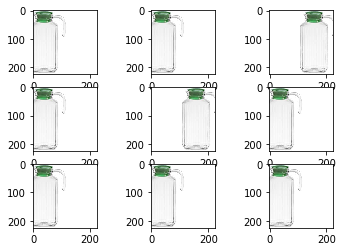

In [43]:
#horizontal shift augmentation
from numpy import expand_dims
import os
import cv2
import keras.preprocessing.image as k
from matplotlib import pyplot
# load the image
img = cv2.imread('glass8.jpg')
# convert to numpy array
data = k.img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = k.ImageDataGenerator(width_shift_range=[-60,60])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
    cv2.imwrite(os.path.join('pos','glass8horizont'+str(i)+'.jpg'),image)
# show the figure
pyplot.show()

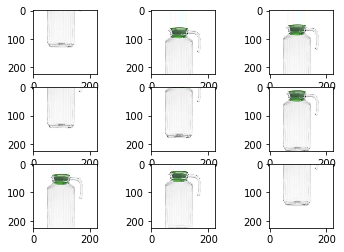

In [46]:
# example of vertical shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('glass8.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.4)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
    cv2.imwrite(os.path.join('pos','glass8vertal'+str(i)+'.jpg'),image)
# show the figure
pyplot.show()

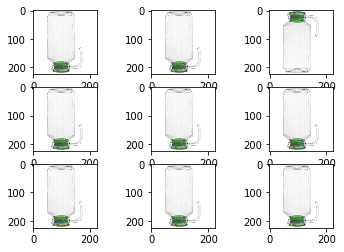

In [47]:
# example of horizontal flip image augmentation
from numpy import expand_dims
import cv2
import os
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('glass8.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(vertical_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images 
    batch = it.next() 
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
    cv2.imwrite(os.path.join('pos','glass8flipp'+str(i)+'.jpg'),image)
# show the figure
pyplot.show()

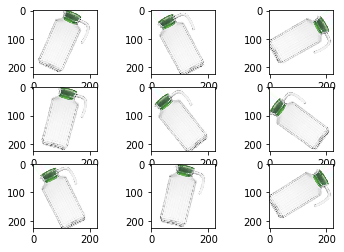

In [50]:
# example of random rotation image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('glass8.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=60)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
    cv2.imwrite(os.path.join('pos','glass8rotat'+str(i)+'.jpg'),image)
# show the figure
pyplot.show()

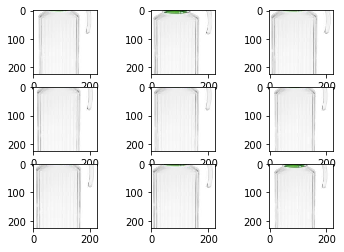

In [53]:
# example of zoom image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('glass8.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.6,0.7])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
    cv2.imwrite(os.path.join('pos','glass8zoomm'+str(i)+'.jpg'),image)
# show the figure
pyplot.show()